In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
import sklearn
from sklearn.linear_model import LinearRegression
from datetime import datetime
import time
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [222]:
%matplotlib inline

In [219]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [307]:
data = pd.read_csv('Nick2_slv.csv', encoding='cp1251')
info = pd.read_csv('infoNick2_slv.csv', encoding='cp1251')

# Смотрим на данные

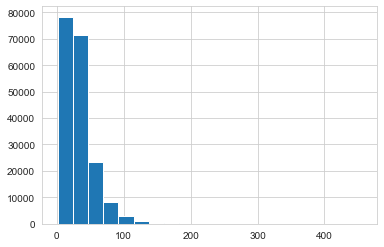

In [255]:
data.n_bid.hist(bins = 20)

In [256]:
info['mint'].value_counts()

Санкт-Петербургский    121
Парижский                2
Брюссельский             1
Name: mint, dtype: int64

In [257]:
info.letters.value_counts()

СПБ ЭБ    27
СПБ АР    17
(ЭБ)      15
СПБ АГ    11
ВС        10
СПБ ВС     8
(АР)       7
СПБ ФЗ     6
(АГ)       6
(ФЗ)       5
(ВС)       4
(*)        2
(**)       1
Name: letters, dtype: int64

In [258]:
info.mint.value_counts()

Санкт-Петербургский    121
Парижский                2
Брюссельский             1
Name: mint, dtype: int64

### buyer - Какие покупатели какую цену дают

In [261]:
times_buy = data['buyer'].value_counts().iloc[:50]
times_buy.head()

jimmysu    1228
imi         805
mefodi      790
оса         672
enter       622
Name: buyer, dtype: int64

In [262]:
most_buyers = data.groupby('buyer', as_index=False)['price'].mean().sort_values(by='price',ascending=False).iloc[:50]#.hist(bins = 20)
most_buyers.head()

,buyer,price
3734,Pavlooshka,193610.000000
17352,сoeli,190536.000000
3470,Nicki,185462.461538
15788,Слоник,181910.000000
10710,olenka.10,165100.000000


In [263]:
(set(most_buyers)).intersection(set(times_buy))

set()

Покупатели, которые чаще покупают не входят в список покупателей самых дорогих монет

buyer - удаляем признак, т.к. в общем случае неприменим, но можно покопаться и дальше

## state

In [264]:
data.state.value_counts()

VF       65321
XF       57924
UNC      29650
AU       26795
FALSE     5283
G          381
VG         355
Proof      222
Name: state, dtype: int64

In [265]:
data.groupby('state').mean().sort_values(by='price',ascending=False)

,n_bid,price
state,,
Proof,31.981982,146973.391892
UNC,33.467386,11417.773963
XF,31.970634,3247.122816
AU,30.150998,3058.784960
VF,32.218551,1414.468272
FALSE,28.561045,655.104297
G,32.157480,507.590551
VG,25.459155,237.647887


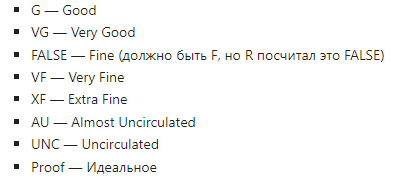

надо преобразовать признак. разница между xf и au небольшая

# auction

In [270]:
data.auction.value_counts()

Wolmar VIP                      50960
Конрос                          45934
Wolmar Стандарт                 30912
Аукцион СПБ                     19630
Numizma                          7197
Anumis                           6337
Reviewdetector                   6078
Habe                             6034
UCoins                           5428
Монетоф                          4133
Ефимок                           1288
Легенда                           831
Александр (интернет аукцион)      510
Монеты и медали                   333
Coins.su                          127
Thaler on-line                     91
Александр (очный аукцион)          90
Аргентум                           18
Name: auction, dtype: int64

In [267]:
data.groupby('auction').median().sort_values(by='price',ascending=False)

,n_bid,price
auction,,
Александр (очный аукцион),1.0,46407.5
Монеты и медали,1.0,18000.0
Александр (интернет аукцион),3.0,6800.0
Wolmar VIP,30.0,4099.0
Coins.su,6.0,2000.0
Reviewdetector,8.0,520.0
Ефимок,22.0,509.5
Монетоф,25.0,271.0
Numizma,11.0,265.0


на разных аукционах разные медианные значения цены проданных монет, но лучше посмотрим по отдельным монетам

In [268]:
dff = data.groupby(['coin_name','auction','state']).median()

In [269]:
dff.head(30)

n_bid     price
coin_name         auction                   state                 
1 рубль, 1895 год Coins.su                  XF       1.0   10000.0
                  Habe                      VF     123.0    7300.0
                  Numizma                   VF      26.0   10381.0
                                            XF      22.0   14874.0
                  Reviewdetector            VF      16.0    5250.0
                                            XF      32.5    8775.0
                  Wolmar VIP                UNC     67.0  147900.0
                                            VF      40.0    7070.0
                                            XF      38.0   21499.0
                  Wolmar Стандарт           VF      48.5    3891.0
                  Александр (очный аукцион) UNC      1.0  201162.0
                  Аукцион СПБ               VF      56.0    7142.0
                  Ефимок                    VF      14.0    5610.0
                  Конрос                    VF      55.0    5762.5
                  Монеты и медали           FALSE    1.0   10000.0
                                            VF       1.0   10250.0
                                            XF       1.0   40000.0
1 рубль, 1896 год Anumis                    VF      95.5    1646.0
                                            XF      88.5    4028.0
                  Coins.su                  VF       7.0    1750.0
                  Habe                      FALSE   46.0     731.5
                                            VF      29.5     757.0
                                            VG      57.0     464.0
                                            XF      51.0    8897.0
                  Numizma                   AU      19.5   15506.5
                                            VF      15.0    1165.0
                                            XF      25.0    7140.0
                  Reviewdetector            VF      13.0    1475.0
                                            XF      18.5    3150.5
                  UCoins                    VF      14.5    1134.0

Модно ввести новый признак - аукцион начального/среднего/VIP ценового сегмента

# Преобразование данных

In [232]:
totimestamp = lambda s, f: np.int32(time.mktime(datetime.strptime(s, f).timetuple()))

In [240]:
def modify_dataset(df):
    df['state'] = df['state'].map({'G':1, 'VG':2, 'FALSE':3, 'VF':4, 'XF':5, 'AU':6, 'UNC':7, 'Proof':8})
    df['timestamp'] = df['date'].map(lambda x: totimestamp(x, f="%Y-%m-%d"))
    # здесь будет замена названий аукционов на их ценовые сегменты
    df['auction'] = df['auction'].map({k: v for v, k in enumerate(df['auction'].unique(), start=1)})
    df.drop(['buyer','date'],axis = 1, inplace = True)
    return df
    # можно придумать новые признаки используя дату

In [241]:
def modify_info_dataset(df):
    df['coin_year'] = df['coin_name'].map(lambda x: int(x.split()[2]))
    df['cop_nominal'] = df['coin_name'].map(lambda x: int(x.split()[0]) if x.split()[1] == 'копеек,'
                                                                        else int(x.split()[0])*100 )
    df.head()
    df['weight'] = df['weight'].map(lambda x: x.split()[0].replace(',','.')).astype('float')
    df['pure_metal_content'] = df['pure_metal_content'].map(lambda x: x.split()[0].replace(',','.')).astype('float')
    df['diameter'] = df['diameter'].map(lambda x: x.split()[0].replace(',','.')).astype('float')
    
    
    # здесь будет замена пропусков средним значением тиража по наиболее похожим данным
    df['circulation'] = df['circulation'].dropna().map(lambda x: int(''.join(x.split())[:-3]))
    df['circulation'].fillna(df['circulation'].dropna().median(), inplace = True)

    mint_dummies = pd.get_dummies(df['mint'], prefix='mint')
    df = pd.concat([df,mint_dummies],axis=1)
    
    # появятся признаки - металл и проба
    df.replace({'metal' : {'серебро (проба 900/1000)' : 1, 'серебро (проба 500/1000)' : 2}}, inplace=True)
    
    df.drop(['catalog_num', 'letters', 'obverse', 'reverse', 'mint'], axis = 1, inplace = True)
    return df

In [308]:
mod_data = modify_dataset(data)

In [309]:
mod_data.head()

,state,auction,n_bid,price,coin_name,timestamp
0,4,1,42,4555,"10 копеек, 1895 год",1634763600
1,4,1,15,2942,"10 копеек, 1895 год",1630530000
2,4,1,13,2465,"10 копеек, 1895 год",1626901200
3,4,1,13,3288,"10 копеек, 1895 год",1625086800
4,4,1,25,2772,"10 копеек, 1895 год",1622062800


In [161]:
mod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185931 entries, 0 to 185930
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   state      185931 non-null  int64         
 1   auction    185931 non-null  int64         
 2   n_bid      185931 non-null  int64         
 3   price      185931 non-null  int64         
 4   date       185931 non-null  datetime64[ns]
 5   coin_name  185931 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 8.5+ MB


In [310]:
mod_info = modify_info_dataset(info)

In [163]:
mod_info.head()

,circulation,metal,weight,pure_metal_content,diameter,coin_name,coin_year,cop_nominal,mint_Брюссельский,mint_Парижский,mint_Санкт-Петербургский
0,7750020.0,2,3.6,1.8,22.0,"20 копеек, 1901 год",1901,20,0,0,1
1,7417514.0,2,3.6,1.8,22.0,"20 копеек, 1902 год",1902,20,0,0,1
2,10000014.0,2,3.6,1.8,22.0,"20 копеек, 1903 год",1903,20,0,0,1
3,13000010.0,2,3.6,1.8,22.0,"20 копеек, 1904 год",1904,20,0,0,1
4,11000000.0,2,3.6,1.8,22.0,"20 копеек, 1905 год",1905,20,0,0,1


In [164]:
mod_info.head()

,circulation,metal,weight,pure_metal_content,diameter,coin_name,coin_year,cop_nominal,mint_Брюссельский,mint_Парижский,mint_Санкт-Петербургский
0,7750020.0,2,3.6,1.8,22.0,"20 копеек, 1901 год",1901,20,0,0,1
1,7417514.0,2,3.6,1.8,22.0,"20 копеек, 1902 год",1902,20,0,0,1
2,10000014.0,2,3.6,1.8,22.0,"20 копеек, 1903 год",1903,20,0,0,1
3,13000010.0,2,3.6,1.8,22.0,"20 копеек, 1904 год",1904,20,0,0,1
4,11000000.0,2,3.6,1.8,22.0,"20 копеек, 1905 год",1905,20,0,0,1


In [311]:
merged_df = mod_data.merge(mod_info, how='inner', on='coin_name')

In [312]:
merged_df

,state,auction,n_bid,price,coin_name,timestamp,circulation,metal,weight,pure_metal_content,diameter,coin_year,cop_nominal,mint_Брюссельский,mint_Парижский,mint_Санкт-Петербургский
0,4,1,42,4555,"10 копеек, 1895 год",1634763600,7417514.0,2,1.8,0.9,17.5,1895,10,0,0,1
1,4,1,15,2942,"10 копеек, 1895 год",1630530000,7417514.0,2,1.8,0.9,17.5,1895,10,0,0,1
2,4,1,13,2465,"10 копеек, 1895 год",1626901200,7417514.0,2,1.8,0.9,17.5,1895,10,0,0,1
3,4,1,13,3288,"10 копеек, 1895 год",1625086800,7417514.0,2,1.8,0.9,17.5,1895,10,0,0,1
4,4,1,25,2772,"10 копеек, 1895 год",1622062800,7417514.0,2,1.8,0.9,17.5,1895,10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185926,8,16,1,108318,"20 копеек, 1917 год",1285362000,3500000.0,2,3.6,1.8,22.0,1917,20,0,0,1
185927,8,1,32,73903,"20 копеек, 1917 год",1272488400,3500000.0,2,3.6,1.8,22.0,1917,20,0,0,1
185928,8,1,39,53846,"20 копеек, 1917 год",1260824400,3500000.0,2,3.6,1.8,22.0,1917,20,0,0,1
185929,8,1,34,80328,"20 копеек, 1917 год",1243371600,3500000.0,2,3.6,1.8,22.0,1917,20,0,0,1


In [171]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185931 entries, 0 to 185930
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   state                     185931 non-null  int64         
 1   auction                   185931 non-null  int64         
 2   n_bid                     185931 non-null  int64         
 3   price                     185931 non-null  int64         
 4   date                      185931 non-null  datetime64[ns]
 5   coin_name                 185931 non-null  object        
 6   circulation               185931 non-null  float64       
 7   metal                     185931 non-null  int64         
 8   weight                    185931 non-null  float64       
 9   pure_metal_content        185931 non-null  float64       
 10  diameter                  185931 non-null  float64       
 11  coin_year                 185931 non-null  int64         
 12  co

# Учет влияния внешних факторов на цену

In [ ]:
#здесь надо учесть инфляцию и т.д. для таргета

In [313]:
# котировка рубли-доллары по дням
dollar_value = pd.read_csv('dol_price.txt')[['<DATE>', '<CLOSE>']]
dollar_value.rename(columns={'<DATE>' : 'date', '<CLOSE>' : 'dollar_value'}, inplace=True)
dollar_value.head()

,date,dollar_value
0,20110101,30.552
1,20110102,30.525
2,20110103,30.533
3,20110104,30.376
4,20110105,30.635


In [314]:
# инфляция доллара по месяцам
inflation = pd.read_csv('inflation.txt', encoding='cp1251', sep='\t')[['Дата выпуска', 'Время']]
inflation.rename(columns={'Дата выпуска' : 'timestamp', 'Время' : 'inf_value'}, inplace=True)
inflation.head()

,timestamp,inf_value
0,10.12.2021 (нояб),"0,8%"
1,10.11.2021 (окт),"0,9%"
2,13.10.2021 (сент),"0,4%"
3,14.09.2021 (авг),"0,3%"
4,11.08.2021 (июль),"0,5%"


In [315]:
# перевод времени
dollar_value['timestamp'] = dollar_value['date'].map(lambda x: totimestamp(str(x), "%Y%m%d"))
dollar_value.drop('date', axis=1, inplace=True)

In [316]:
dollar_value.head()

,dollar_value,timestamp
0,30.552,1293829200
1,30.525,1293915600
2,30.533,1294002000
3,30.376,1294088400
4,30.635,1294174800


In [317]:
# соединяем котировки и датасет
merged_df = merged_df.merge(dollar_value, how='inner', on='timestamp')
# перевод рублей в доллары
merged_df['dollar_price'] = merged_df['price'] / merged_df['dollar_value']
merged_df.head()

,state,auction,n_bid,price,coin_name,timestamp,circulation,metal,weight,pure_metal_content,diameter,coin_year,cop_nominal,mint_Брюссельский,mint_Парижский,mint_Санкт-Петербургский,dollar_value,dollar_price
0,4,1,42,4555,"10 копеек, 1895 год",1634763600,7417514.0,2,1.8,0.9,17.50,1895,10,0,0,1,71.0692,64.092462
1,5,1,29,10250,"25 копеек, 1895 год",1634763600,1000004.0,1,5.0,4.5,23.00,1895,25,0,0,1,71.0692,144.225628
2,4,1,28,4276,"1 рубль, 1896 год",1634763600,5205042.0,1,20.0,18.0,33.65,1896,100,0,0,1,71.0692,60.166711
3,4,1,17,2153,"1 рубль, 1897 год",1634763600,26000000.0,1,20.0,18.0,33.65,1897,100,1,0,0,71.0692,30.294417
4,4,1,13,2153,"1 рубль, 1897 год",1634763600,26000000.0,1,20.0,18.0,33.65,1897,100,1,0,0,71.0692,30.294417


In [318]:
# обработка данных об инфляции
inflation['timestamp'] = inflation['timestamp'].map(lambda x: totimestamp(re.split('\\s\\(', x)[0], f='%d.%m.%Y'))
inflation['inf_value'] = inflation['inf_value'].map(lambda x: float(x[:-1].replace(',', '.')))
inflation['inf_coef'] = 1 - inflation['inf_value'] / 100

In [319]:
n_month = inflation.shape[0] - 1
inflation.at[n_month, 'inf_coef'] = 1
inflation.sort_values('timestamp', inplace=True)
for i in range(1, n_month + 1):
    inflation.at[n_month - i, 'inf_coef'] = inflation.iloc[i - 1]['inf_coef'] * inflation.iloc[i]['inf_coef']

In [320]:
inflation = inflation.set_index('timestamp')
inflation = inflation.reindex(range(inflation.index[0], inflation.index[-1] + 86400, 86400), method='pad')

In [321]:
merged_df = merged_df.merge(inflation, how='inner', on='timestamp')

In [322]:
merged_df['inf_dollar_price'] = merged_df['dollar_price'] * merged_df['inf_coef']
merged_df.drop(['inf_value'], axis=1, inplace=True)
merged_df.head()

,state,auction,n_bid,price,coin_name,timestamp,circulation,metal,weight,pure_metal_content,diameter,coin_year,cop_nominal,mint_Брюссельский,mint_Парижский,mint_Санкт-Петербургский,dollar_value,dollar_price,inf_coef,inf_dollar_price
0,4,1,42,4555,"10 копеек, 1895 год",1634763600,7417514.0,2,1.8,0.9,17.50,1895,10,0,0,1,71.0692,64.092462,0.806001,51.658606
1,5,1,29,10250,"25 копеек, 1895 год",1634763600,1000004.0,1,5.0,4.5,23.00,1895,25,0,0,1,71.0692,144.225628,0.806001,116.246039
2,4,1,28,4276,"1 рубль, 1896 год",1634763600,5205042.0,1,20.0,18.0,33.65,1896,100,0,0,1,71.0692,60.166711,0.806001,48.494445
3,4,1,17,2153,"1 рубль, 1897 год",1634763600,26000000.0,1,20.0,18.0,33.65,1897,100,1,0,0,71.0692,30.294417,0.806001,24.417339
4,4,1,13,2153,"1 рубль, 1897 год",1634763600,26000000.0,1,20.0,18.0,33.65,1897,100,1,0,0,71.0692,30.294417,0.806001,24.417339


In [327]:
merged_df.head(10)

,state,auction,n_bid,price,coin_name,timestamp,circulation,metal,weight,pure_metal_content,diameter,coin_year,cop_nominal,mint_Брюссельский,mint_Парижский,mint_Санкт-Петербургский,dollar_value,dollar_price,inf_coef,inf_dollar_price
0,4,1,42,4555,"10 копеек, 1895 год",1634763600,7417514.0,2,1.8,0.90,17.50,1895,10,0,0,1,71.0692,64.092462,0.806001,51.658606
1,5,1,29,10250,"25 копеек, 1895 год",1634763600,1000004.0,1,5.0,4.50,23.00,1895,25,0,0,1,71.0692,144.225628,0.806001,116.246039
2,4,1,28,4276,"1 рубль, 1896 год",1634763600,5205042.0,1,20.0,18.00,33.65,1896,100,0,0,1,71.0692,60.166711,0.806001,48.494445
3,4,1,17,2153,"1 рубль, 1897 год",1634763600,26000000.0,1,20.0,18.00,33.65,1897,100,1,0,0,71.0692,30.294417,0.806001,24.417339
4,4,1,13,2153,"1 рубль, 1897 год",1634763600,26000000.0,1,20.0,18.00,33.65,1897,100,1,0,0,71.0692,30.294417,0.806001,24.417339
5,4,1,21,2566,"1 рубль, 1897 год",1634763600,26000000.0,1,20.0,18.00,33.65,1897,100,1,0,0,71.0692,36.105655,0.806001,29.101203
6,4,1,13,2153,"1 рубль, 1898 год",1634763600,25877842.0,1,20.0,18.00,33.65,1898,100,0,0,1,71.0692,30.294417,0.806001,24.417339
7,4,1,43,2263,"1 рубль, 1898 год",1634763600,25877842.0,1,20.0,18.00,33.65,1898,100,0,0,1,71.0692,31.842204,0.806001,25.664857
8,4,1,21,2753,"1 рубль, 1899 год",1634763600,7417514.0,1,20.0,18.00,33.65,1899,100,0,0,1,71.0692,38.736893,0.806001,31.221985
9,5,1,35,823,"5 копеек, 1902 год",1634763600,6000009.0,2,0.9,0.45,15.10,1902,5,0,0,1,71.0692,11.580263,0.806001,9.333706


# Тестирование модели

In [351]:
X = merged_df.drop(["timestamp", "coin_name", "price"], axis=1)
y = merged_df["price"]

In [352]:
index_test = round(X.shape[0]*0.8)

In [353]:
index_test

125070

In [354]:
X_train = X.loc[:index_test]
y_train = y.loc[:index_test]
X_test = X.loc[index_test:]
y_test = y.loc[index_test:]

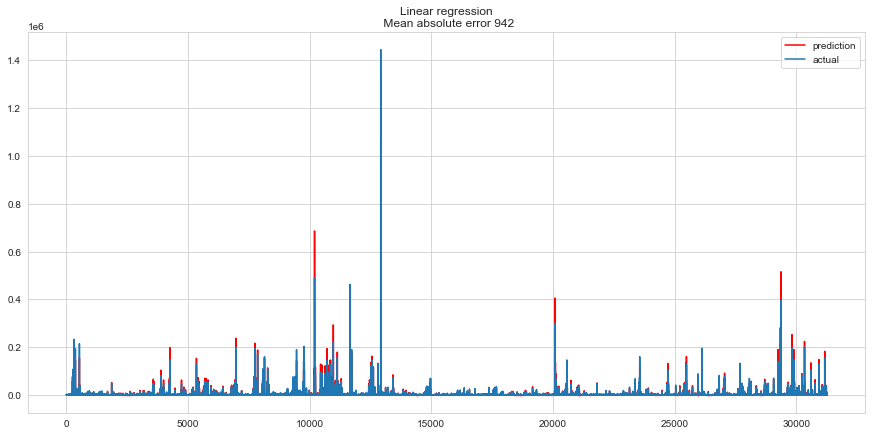

In [371]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_prediction = lr.predict(X_test)
plt.figure(figsize=(15, 7))
plt.plot(lr_prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Linear regression\n Mean absolute error {}".format(round(mean_absolute_error(lr_prediction, y_test))))
plt.grid(True);

In [372]:
np.any(lr_prediction<0)

True

In [373]:
lr_negative_pred = pd.Series(x for x in lr_prediction if x <0)
lr_negative_pred

0         -11.748632
1        -269.569441
2        -324.652923
3        -366.916257
4        -157.320642
            ...     
13164    -172.609062
13165   -1216.264168
13166   -1128.144097
13167    -146.059611
13168   -1234.633572
Length: 13169, dtype: float64

In [374]:
lr_negative_pred.median()

-578.9708832369579

In [345]:
!pip install catboost

In [346]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()

In [359]:
cat.fit(X_train,y_train,verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [360]:
from catboost import Pool, cv
params = {"iterations": 100,
          "depth": 2,
          "loss_function": "RMSE",
          "verbose": False}
cv_dataset = Pool(data=X_train,
                  label=y_train)
scores = cv(cv_dataset,
            params,
            fold_count=2, 
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/2]

bestTest = 11719.02212
bestIteration = 99

Training on fold [1/2]

bestTest = 6696.182655
bestIteration = 99



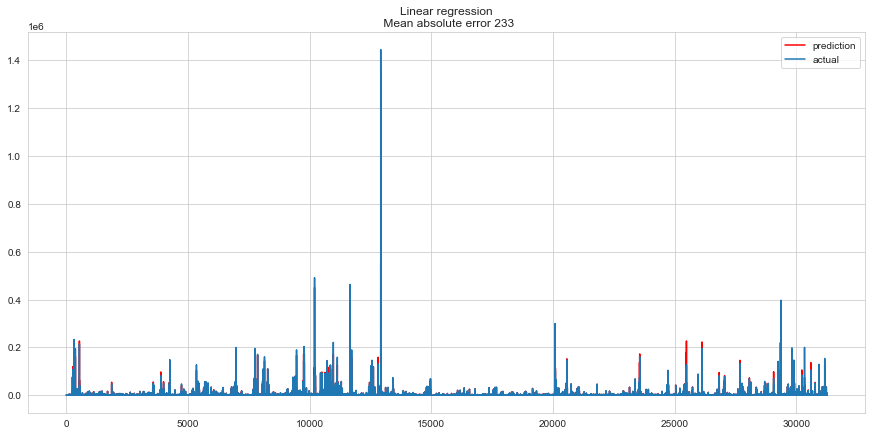

In [361]:
prediction = cat.predict(X_test)
plt.figure(figsize=(15, 7))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Linear regression\n Mean absolute error {}".format(round(mean_absolute_error(prediction, y_test))))
plt.grid(True);

In [362]:
np.any(prediction<0)

True

In [369]:
negative_pred = pd.Series(x for x in prediction if x <0)
negative_pred

0     -17.863472
1      -4.138073
2     -33.149135
3     -48.877661
4     -87.064366
         ...    
311   -64.006903
312   -56.242209
313   -15.403020
314   -16.239650
315    -0.727775
Length: 316, dtype: float64

In [370]:
negative_pred.median()

-30.377101362929352

В CatBoost медианные значения отрицательных чисел намного меньше (примерно в 10 раз) как и самих отрицительных значений меньше